### Decision Boundaries in K-Nearest Neighbours (KNN)
- It is a line (or) surface that divides different groups in a classification task.
- It shows which areas belong to which class based on what the model decides.
- KNN algorithm operates on the principle that similar data points exist in close proximity within a feature space.
- The shape of this boundary depends on -
  - The value of k (how many neighbours are considered).
  - How the data points are spread out in space.
- For Eg -
  - Given a dataset with two classes the decision boundary can be visualized as the line (or) curve dividing the two regions where each class is predicted.
  - For 1-NN Classifier the decision boundary can be visualized using a Voronoi diagram.

### Using Voronoi Diagrams to visualize:
- A Voronoi diagram splits space into regions based on which training point is closest.
- Each region is called a Voronoi cell contains all the points closest to one specific training point.
- The lines between regions are where points are equally close to two (or) more seeds.These are the decision boundaries for 1-NN which is very irregular in shape.
- If we label the training points by class the Voronoi diagram shows how KNN assigns a new point based on which region it falls into.
- The boundary line between two points p(i) and p(j) is the perpendicular bisector of the line joining them meaning it's a line that cuts the segment between them exactly in half at a right angle. 

### Relationship between KNN Decision Boundaries and Voronoi Diagrams:
- In two-dimensional space the decision boundaries of KNN can be visualized as Voronoi diagrams. Here's how -
#### 1. KNN Boundaries:
- The decision boundary for KNN is determined by regions where classification changes based on the nearst neighbors.
- K approaches infinity, these boundaries approach the Voronoi diagram boundaries.
#### 2. Voronoi Diagram as a Special Case:
- When k=1 KNN's decision boundaries directly correspond to the voronoi diagram of the training points.
- Each region in the Voronoi diagram represents the area where the nearest training point is closest.

### How KNN Defines Decision Boundaries:
- In KNN, decision boundaries can be influenced by the choice of k and the distance metric used:
#### 1. Impact of "k" on Decision Boundaries:
- The number of neighnours(k) affects the shape and smoothness of the decision boundary.
  ##### 1. Small k:
  - When k is small the decision boundary can become very flexible, closely following the training data.
  - This can lead to overfitting.
  ##### 2. Large k:
  - when k is large the decision boundary smooths out and becomes less sensitive to individual data points, potentially leading to underfitting.
 
#### 2. Distance Metric:
- The decision boundary is affected by distance metric used like Euclidean, Manhatten.Different metrics can lead to different boundary shapes.
  ##### 1. Euclidean Distance:
  - Commonly used leading to circular (or) elliptical decision boundaries in two-dimensional space.
  ##### 2. Manhatten Distance:
  - Results in axis-aligned decision boundaries.

### Decision Boundaries for Binary Classification with Varying k
- For a two-dimensional dataset decision boundary can be plotted by-
  1. Creating a Grid - Generate a grid of points covering the feature space.
  2. Classifying Grid Points - Uses the KNN algorithm to classify each point in the grid based on its neighbours.
  3. Plotting - Color the grid points according to their class labels and draw the boundaries where the class changes. 

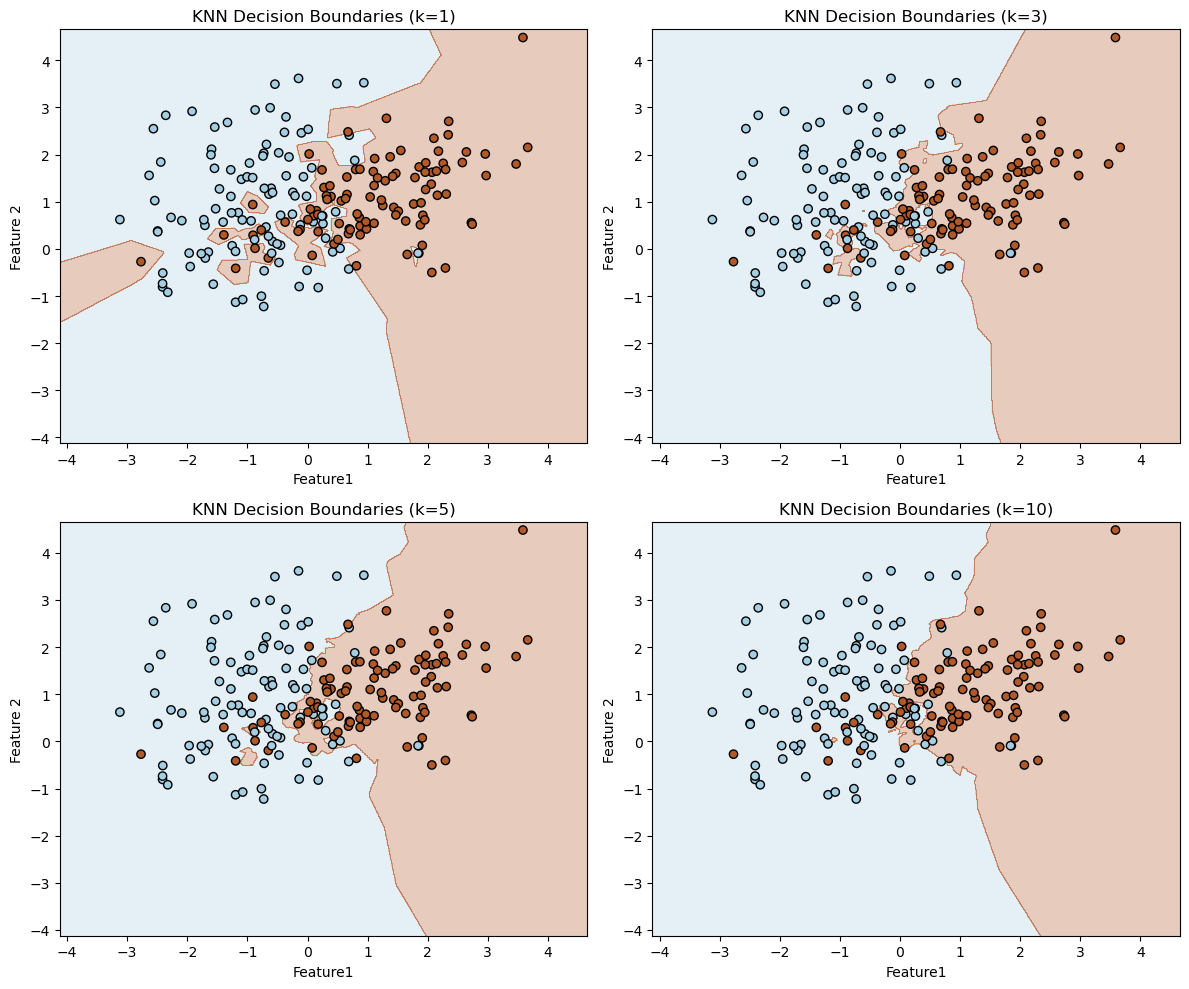

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=1, random_state=42)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,0].min() - 1, X[:,0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

fig, axs = plt.subplots(2,2, figsize=(12,10))
k_values = [1,3,5,10]

for ax, k in zip(axs.flat, k_values):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k',
               cmap=plt.cm.Paired, marker='o')
    ax.set_title(f'KNN Decision Boundaries (k={k})')
    ax.set_xlabel('Feature1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


- For small k the boundary is highly sensitive to local variations and can be irregular.
- For large k the boundary smooths out, reflecting a more generalized view of the data distribution.